In [1]:
# Набор данных MovieLens 1M
import pandas as pd
pd.options.display.max_rows=10 # Уменьшить объём вывода
unames=['user_id','gender','age','occupation','zip']
users=pd.read_table(r'datasets/movielens/users.dat',sep='::',header=None,
                   names=unames, engine = 'python')
rnames=['user_id','movie_id','rating','timestamp']
ratings=pd.read_table(r'datasets/movielens/ratings.dat',sep='::',header=None,
                     names=rnames, engine = 'python')
mnames=['movie_id','title','genres']
movies=pd.read_table(r'datasets/movielens/movies.dat',sep='::',header=None,
                    names=mnames, engine = 'python')

In [2]:
# Объединить таблицы
data=pd.merge(pd.merge(ratings,users),movies)
# Средние рейтинги каждого пола
mean_ratings=data.pivot_table('rating',index='title',
                             columns='gender',aggfunc='mean')
# Отобрать фильмы получившие не менее 250 оценок
ratings_by_title=data.groupby('title').size()
active_titles=ratings_by_title.index[ratings_by_title>=250]
# Отобрать соответствующие строки
mean_ratings=mean_ratings.loc[active_titles]
# Найти фильмы наиболее рейтинговые для женщин
top_female_ratings=mean_ratings.sort_values(by='F', ascending=False)
print(top_female_ratings[:10])

gender                                                     F         M
title                                                                 
Close Shave, A (1995)                               4.644444  4.473795
Wrong Trousers, The (1993)                          4.588235  4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)       4.572650  4.464589
Wallace & Gromit: The Best of Aardman Animation...  4.563107  4.385075
Schindler's List (1993)                             4.562602  4.491415
Shawshank Redemption, The (1994)                    4.539075  4.560625
Grand Day Out, A (1992)                             4.537879  4.293255
To Kill a Mockingbird (1962)                        4.536667  4.372611
Creature Comforts (1990)                            4.513889  4.272277
Usual Suspects, The (1995)                          4.513317  4.518248


In [3]:
# Расчёт несогласия в оценках
mean_ratings['diff']=mean_ratings['M']-mean_ratings['F']
sorted_by_diff=mean_ratings.sort_values(by='diff')
print(sorted_by_diff[:10])

gender                                        F         M      diff
title                                                              
Dirty Dancing (1987)                   3.790378  2.959596 -0.830782
Jumpin' Jack Flash (1986)              3.254717  2.578358 -0.676359
Grease (1978)                          3.975265  3.367041 -0.608224
Little Women (1994)                    3.870588  3.321739 -0.548849
Steel Magnolias (1989)                 3.901734  3.365957 -0.535777
Anastasia (1997)                       3.800000  3.281609 -0.518391
Rocky Horror Picture Show, The (1975)  3.673016  3.160131 -0.512885
Color Purple, The (1985)               4.158192  3.659341 -0.498851
Age of Innocence, The (1993)           3.827068  3.339506 -0.487561
Free Willy (1993)                      2.921348  2.438776 -0.482573


In [4]:
print(mean_ratings)

gender                                    F         M      diff
title                                                          
'burbs, The (1989)                 2.793478  2.962085  0.168607
10 Things I Hate About You (1999)  3.646552  3.311966 -0.334586
101 Dalmatians (1961)              3.791444  3.500000 -0.291444
101 Dalmatians (1996)              3.240000  2.911215 -0.328785
12 Angry Men (1957)                4.184397  4.328421  0.144024
...                                     ...       ...       ...
Young Guns (1988)                  3.371795  3.425620  0.053825
Young Guns II (1990)               2.934783  2.904025 -0.030758
Young Sherlock Holmes (1985)       3.514706  3.363344 -0.151362
Zero Effect (1998)                 3.864407  3.723140 -0.141266
eXistenZ (1999)                    3.098592  3.289086  0.190494

[1216 rows x 3 columns]


In [5]:
# Фильмы которым мужчины поставили более высокие оценки чем женщины
print(sorted_by_diff[::-1][:10])

gender                                         F         M      diff
title                                                               
Good, The Bad and The Ugly, The (1966)  3.494949  4.221300  0.726351
Kentucky Fried Movie, The (1977)        2.878788  3.555147  0.676359
Dumb & Dumber (1994)                    2.697987  3.336595  0.638608
Longest Day, The (1962)                 3.411765  4.031447  0.619682
Cable Guy, The (1996)                   2.250000  2.863787  0.613787
Evil Dead II (Dead By Dawn) (1987)      3.297297  3.909283  0.611985
Hidden, The (1987)                      3.137931  3.745098  0.607167
Rocky III (1982)                        2.361702  2.943503  0.581801
Caddyshack (1980)                       3.396135  3.969737  0.573602
For a Few Dollars More (1965)           3.409091  3.953795  0.544704


In [13]:
# Наибольшее разногласие
rating_std_by_title=data.groupby('title')['rating'].std()
rating_std_by_title=rating_std_by_title.loc[active_titles]
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

[Text(0.5, 0, 'Ratings std'), Text(0, 0.5, 'Movies')]

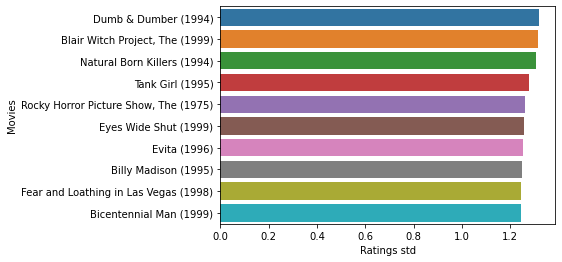

In [19]:
import seaborn as sns
subset=rating_std_by_title.sort_values(ascending=False)[:10]
ax=sns.barplot(y=subset.index, x=subset.values)
ax.set(xlabel="Ratings std", ylabel = "Movies")